# 1. Import Libraries and load dataset

In [6]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

num_bins = 10

# 2. Read the data as dataframe

In [7]:
#colnames = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day','month','duration',]
Bank_df = pd.read_csv('bank-full.csv')

# 3. Exploratory Data Analysis

In [8]:
Bank_df.head(10)
#0s signify a lot of missing values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


3.a  Shape of Data 

DF has 45211 rows and 17 columns

In [9]:
Bank_df.shape

(45211, 17)

In [10]:
print(Bank_df.groupby('Target').size())
# Split of customers among 2 groups : If customers subscribed to Term Deposit or not
# Looks like data is biased towards customer who didn't subscribed for term deposit

Target
no     39922
yes     5289
dtype: int64


3.b      DataTypes of each attribute

In [11]:
Bank_df.info()
# Dataset has combination of integer and categorical datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
for feature in Bank_df.columns: # Loop through all columns in the dataframe
    if Bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        Bank_df[feature] = pd.Categorical(Bank_df[feature]).codes # Replace strings with an integer

In [13]:
Bank_df.head()
# All object datatypes are being converted into integers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


3.c # Check the presence of missing OR NULL values

In [14]:
Bank_df.isnull().values.any()

False

3.d # 5 point summary of Numerical Attributes

In [15]:
Bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


3.e # Checking the presence of outliers

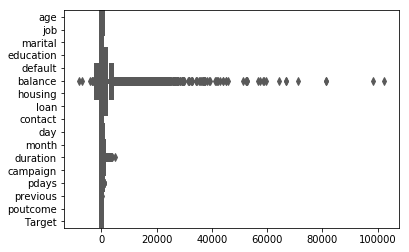

In [16]:
sns.boxplot(data=Bank_df,orient="h", palette="Set2",width=5,linewidth=5)

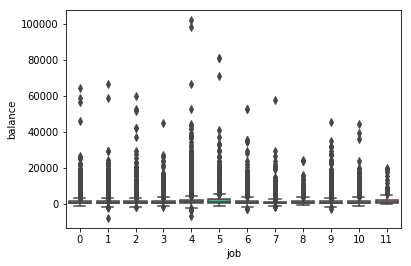

In [17]:
sns.boxplot(x="job", y="balance", data=Bank_df)

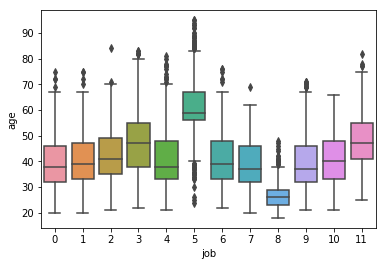

In [18]:
sns.boxplot(x="job", y="age", data=Bank_df)

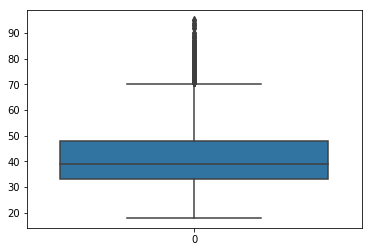

In [19]:
sns.boxplot(data=Bank_df.age)

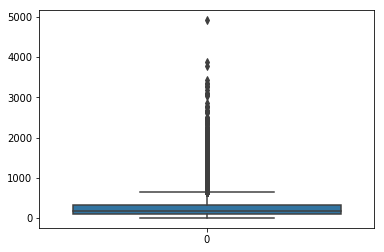

In [20]:
sns.boxplot(data=Bank_df.duration)

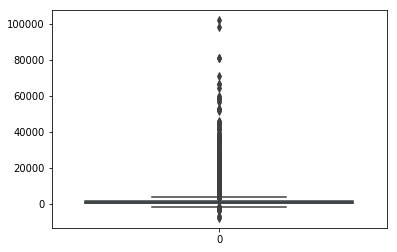

In [21]:
sns.boxplot(data=Bank_df.balance)

Following columns have outliers :-
Age , Balance & duration

# 4 Prepare the data to train the model 

# 4.1) Outliers Treatment

In [22]:
#Bank_df["age"] = Bank_df["age"].mask(Bank_df["age"] >90, Bank_df['age'].median())
# Age column has outliers but they shouldn't be removed because we get insights of data from people having age group > 70

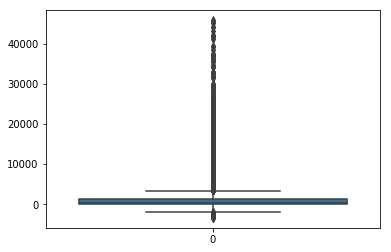

In [23]:
Bank_df["balance"] = Bank_df["balance"].mask(Bank_df["balance"] <-4000, Bank_df['balance'].median())
Bank_df["balance"] = Bank_df["balance"].mask(Bank_df["balance"] > 50000, Bank_df['balance'].median())
sns.boxplot(data=Bank_df.balance)
# There are 3 records below -4000 and 18 records above 50000 tagged as outliers and hence replaced by the median values of balance column

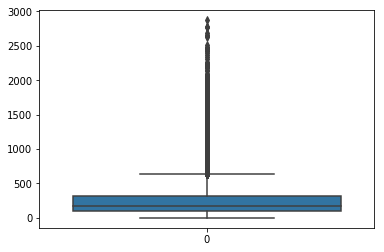

In [24]:
Bank_df["duration"] = Bank_df["duration"].mask(Bank_df["duration"] > 3000, Bank_df['duration'].median())
sns.boxplot(data=Bank_df.duration)
# There are 14 records above 3000 treated as outliers and hence replaced by median values of duration column

# 4 Prepare the data to train the model 

# 4.2) Missing Value Treatment
#There are no missing values in dataset across all columns.

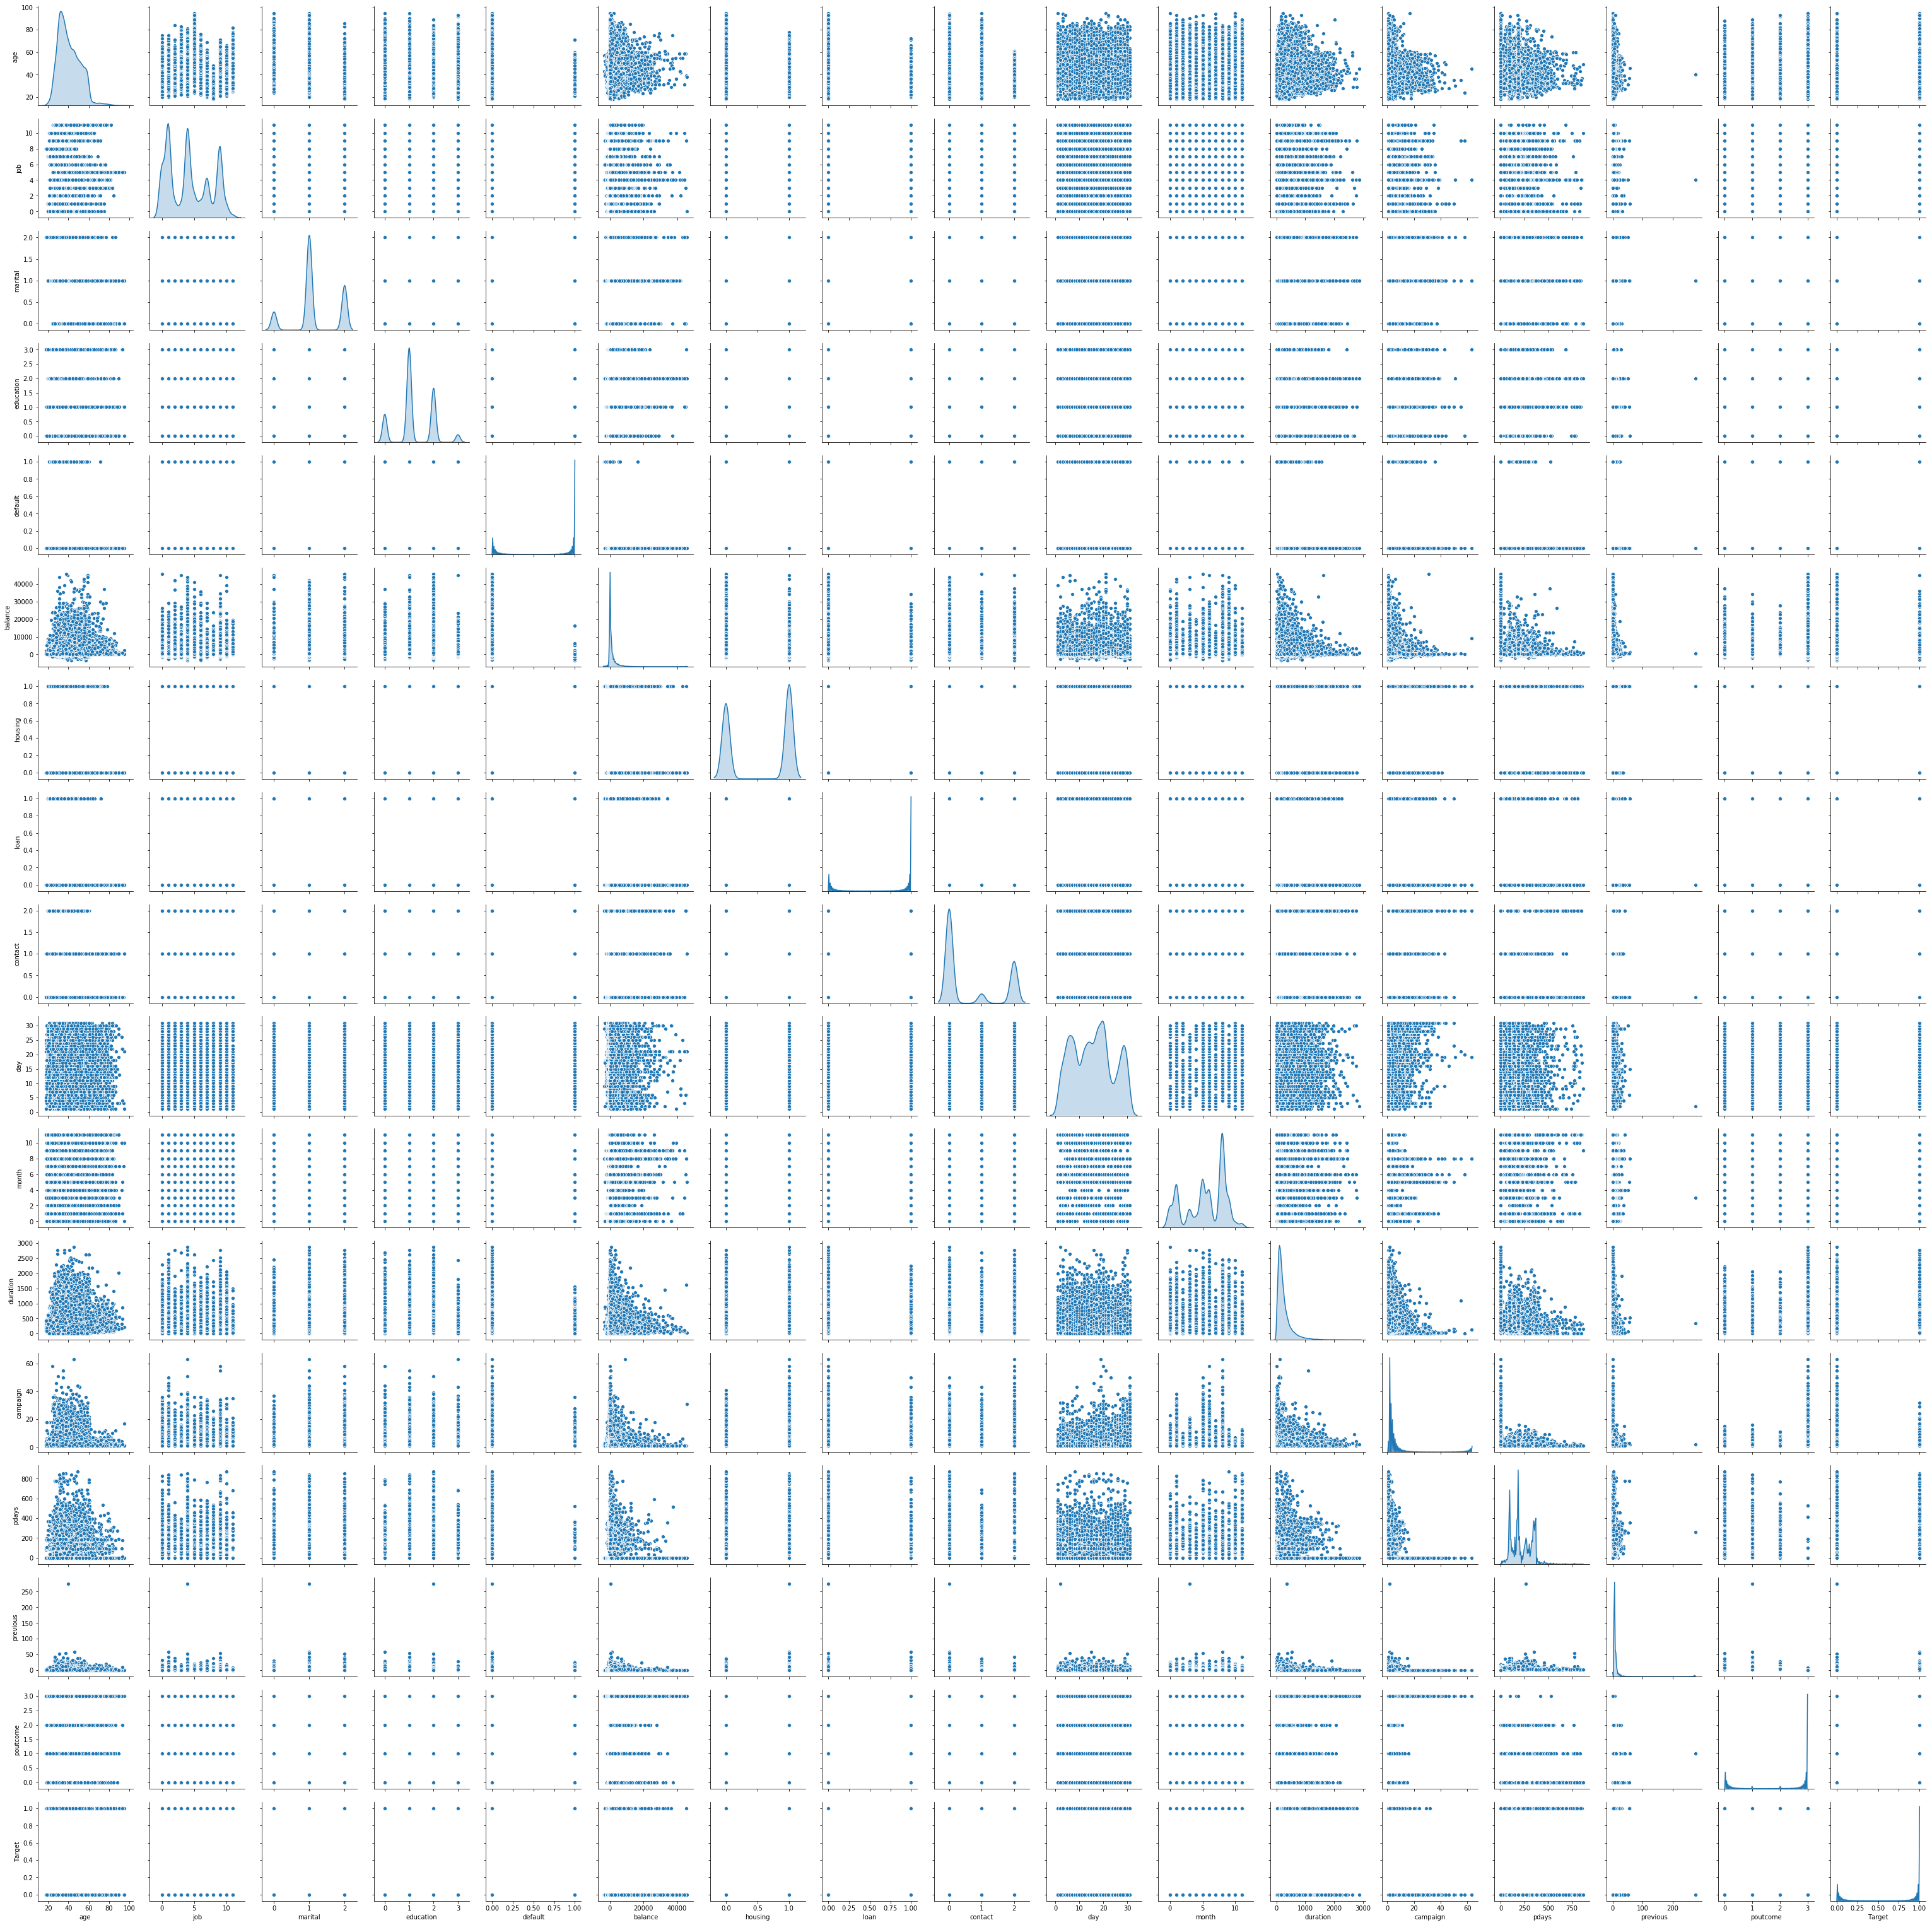

In [25]:
sns.pairplot(Bank_df, diag_kind='kde')

In [26]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


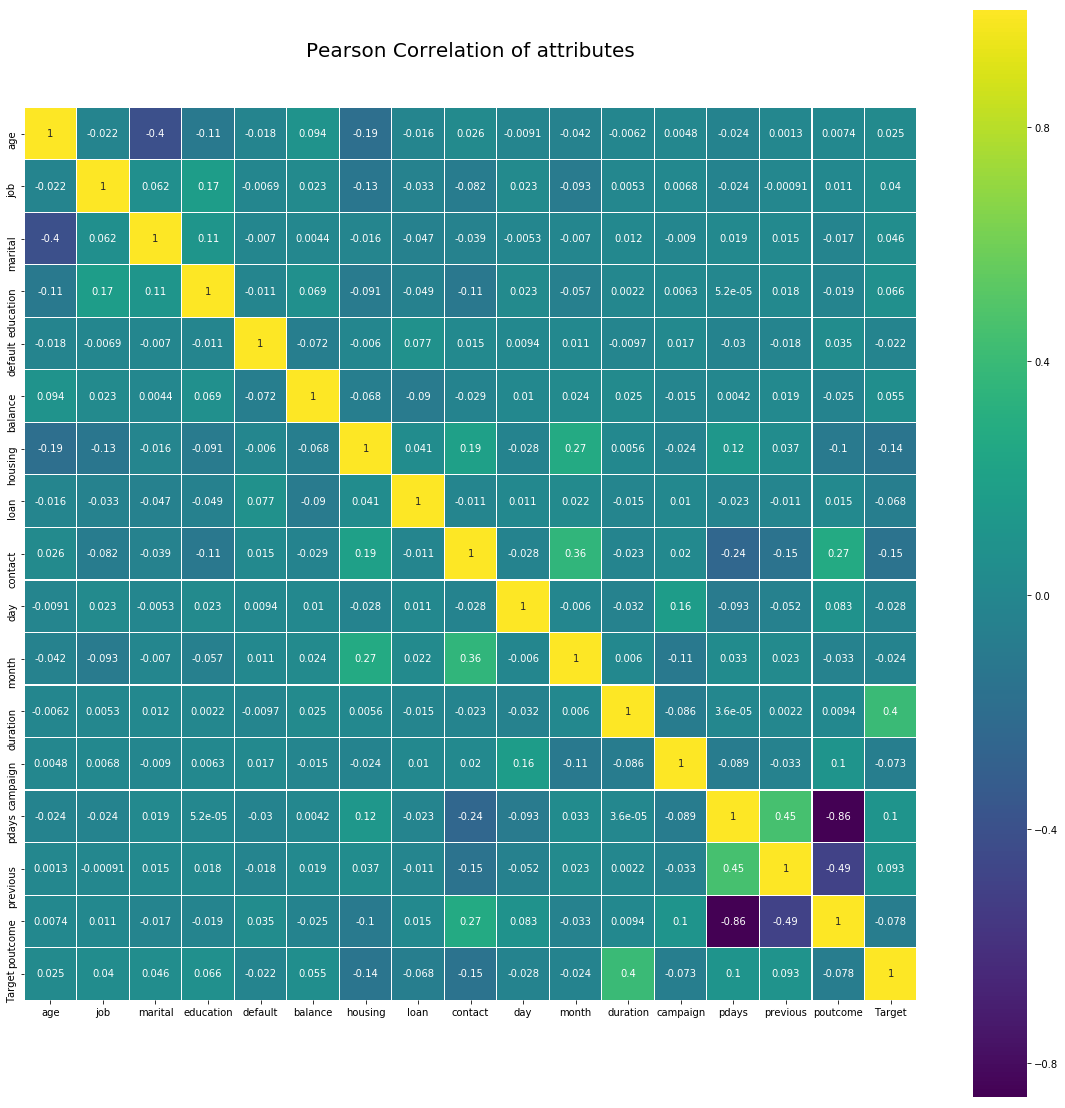

In [27]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of attributes', y=1.05, size=20)
sns.heatmap(Bank_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

 Analysis of Correlation Matrix.
Following set of pair of columns show relatively better correlation
 1) duration to Target relation
 2) pdays to previous relation

# Prepare the data to train the model : 
# 4.3) Separate Dependent & Independent Variables
# 4.4) Perform Over Sampling using SMOTE 

Oversampling is required to be done because dataset is biased towards the customer who didn't prescribed for term deposit.
Approx 40K customers didn't prescribed for term deposit whereas 5K customers prescribed for term deposit

In [28]:
cols = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"] 
X = Bank_df[cols]
y = Bank_df['Target']
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

Below results from SMOTE function have confirmed that now we have unbiased datasets. Dataset is no more biased towards customers who didn't prescribed for term deposit

In [29]:
X_resampled.shape, y_resampled.shape

((79844, 16), (79844,))

 # 4.5) Split the dataset into Train/Test sets in 70:30 ratio

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2)

# 4.6) Scale all the attributes to bring them in single scale

In [31]:
#To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
#encoded_Y_train = lab_enc.fit_transform(Y_train)
#encoded_Y_test = lab_enc.fit_transform(Y_test)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#Y_train_scaled = preprocessing.scale(encoded_Y_train)
#Y_test_scaled = preprocessing.scale(encoded_Y_test)


# 5) Train standard classification algorithms

# 5.1) Logistics Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
Y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, Y_test)

print(metrics.classification_report(Y_test, Y_predict))
print(metrics.confusion_matrix(Y_test, Y_predict))

print(" Training Model score is  %2.3f" % model.score(X_train_scaled, Y_train))
print(" Test Model score is  %2.3f" % model.score(X_test_scaled, Y_test))
# evaluate accuracy & Recall
print(" Accracy Score is %2.3f" % accuracy_score(Y_test, Y_predict))
print(" Recall Score is %2.3f" % recall_score(Y_test, Y_predict))
print(" LR Model score is  %2.3f" % model_score)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     12116
           1       0.83      0.88      0.85     11838

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954

[[ 9983  2133]
 [ 1423 10415]]
 Training Model score is  0.854
 Test Model score is  0.852
 Accracy Score is 0.852
 Recall Score is 0.880
 LR Model score is  0.852


LR has approx sam accuracy in training/Test models which is 85%. Accuracy & F1 score is 85%

# 5.2) Naive Bayes Model for Classification

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, Y_train)
print(model)
# make predictions
expected = Y_test
predicted = model.predict(X_test_scaled)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy:Score is %2.3f" % metrics.accuracy_score(expected, predicted))
print("Training:Score is %2.3f" %  model.score(X_train_scaled, Y_train))
print("Test:Score is %2.3f" %  model.score(X_test_scaled, Y_test))
# evaluate accuracy & Recall
print("Accuracy: is %2.3f" %  accuracy_score(expected, predicted))
print("Recall is %2.3f" %  recall_score(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.90      0.55      0.68     12116
           1       0.67      0.94      0.78     11838

    accuracy                           0.74     23954
   macro avg       0.78      0.74      0.73     23954
weighted avg       0.78      0.74      0.73     23954

[[ 6628  5488]
 [  754 11084]]
Accuracy:Score is 0.739
Training:Score is 0.742
Test:Score is 0.739
Accuracy: is 0.739
Recall is 0.936


NB has pretty low accuracy in training/Test models which is 74%. Accuracy is 74% and F1 Score is 68%

# 5.3) K-NN Model for Classification

In [244]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

from sklearn import model_selection
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_resampled,y_resampled, test_size=test_size, random_state=seed)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


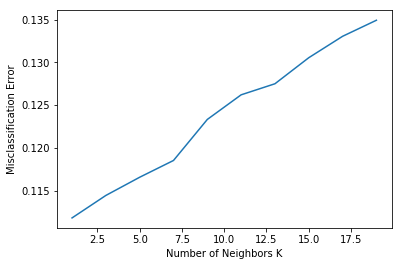

In [245]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Misclassification Error is least when K Value is 1

In [246]:
#Use k=3 as the final model for prediction
from sklearn.preprocessing import MinMaxScaler
knn = KNeighborsClassifier(n_neighbors = 1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# fitting the model
knn.fit(X_train_scaled, Y_train)

# predict the response
y_pred = knn.predict(X_test_scaled)

# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.classification_report(Y_test, y_pred))
print(model.score(X_train_scaled, Y_train))
print(model.score(X_test_scaled, Y_test))
print("Accuracy Score:",metrics.accuracy_score(Y_test, y_pred))
print("Recall Score:", recall_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     11971
           1       0.88      0.90      0.89     11983

    accuracy                           0.89     23954
   macro avg       0.89      0.89      0.89     23954
weighted avg       0.89      0.89      0.89     23954

0.8918411164787976
0.8902897219671037
Accuracy Score: 0.8882023879101612
Recall Score: 0.8950179420846199


KNN Algorithm has very low training and test scores. Precision and recall scores among 0 & 1 classes doesn't vary much and in range of 85 % and 95 %

# 5.4 Support Vector for Classification

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

from sklearn import model_selection
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_resampled,y_resampled, test_size=test_size, random_state=seed)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, Y_train)

# make predictions
expected = Y_test
predicted = svc.predict(X_test_scaled)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, Y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, Y_test)))

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Accuracy on training set: 0.86
Accuracy on test set: 0.86
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11971
           1       0.85      0.89      0.87     11983

    accuracy                           0.86     23954
   macro avg       0.86      0.86      0.86     23954
weighted avg       0.86      0.86      0.86     23954

[[10056  1915]
 [ 1378 10605]]


Support Vector Classification has 86% Training/Test data scores. Precision/Recall & F1 scores across O & 1 classes is in range of 84% to 86%.

In [42]:
# C Value in SVM is increased to 100
svc = SVC(C=100)
svc.fit(X_train_scaled, Y_train)

# make predictions
expected = Y_test
predicted = svc.predict(X_test_scaled)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, Y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, Y_test)))

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


Accuracy on training set: 0.877
Accuracy on test set: 0.876
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11971
           1       0.86      0.89      0.88     11983

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954

[[10276  1695]
 [ 1279 10704]]


Modifying default value of C from 1 to 100 marginally (1-2%) enhances the performance of SVM model.

# 6. Building Ensemble Models

# 6.1 Decision Tree - Please note that scaled data isn't used in decision tree. Because we are comparing the results with actual data especially when regularization of data is being done

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

print(" Training Model score is  %2.3f" % dt_model.score(X_train , Y_train))
print(" Testing Model score is  %2.3f" % dt_model.score(X_test , Y_test))


 Training Model score is  1.000
 Testing Model score is  0.898


# Regularizing the Decision Tree

In [112]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_train, Y_train)
test_pred = dt_model.predict(X_test)
dt_model.score(X_test , Y_test)

0.8506721215663354

In [118]:
print(" Training Model score after Regularizing is  %2.3f" % dt_model.score(X_train , Y_train))
print(" Testing Model score after Regularizing is  %2.3f" % dt_model.score(X_test , Y_test))

 Training Model score after Regularizing is  0.852
 Testing Model score after Regularizing is  0.851


After Regularizing Decision Tree, we see that training & Test scores are comparable (Approx 84%-85%) and there isn't any case of overfit which can be evidentally seen when decision tree is not regularized and training dataset was overfit

# 6.2 Random Forest Algorithm

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train_scaled, Y_train)
test_pred = rfcl.predict(X_test_scaled)

print(" Training Model score is %2.3f" % rfcl.score(X_train_scaled , Y_train))
print(" Testing Model score is %2.3f" % rfcl.score(X_test_scaled , Y_test))

print("Accuracy: is %2.3f" %  accuracy_score(Y_test, test_pred))
print("Recall is %2.3f" %  recall_score(Y_test, test_pred))

 Training Model score is 0.862
 Testing Model score is 0.857
Accuracy: is 0.857
Recall is 0.893


Random Forest has optimum performance and the overall accuracy along with training/test performance is around 86%

# 6.3 Adaboost Algorithm

In [120]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train_scaled, Y_train)
test_pred = abcl.predict(X_test_scaled)

print(" Training Model score is %2.3f" % abcl.score(X_train_scaled , Y_train))
print(" Testing Model score is %2.3f" % abcl.score(X_test_scaled , Y_test))

print("Accuracy: is %2.3f" %  accuracy_score(Y_test, test_pred))
print("Recall is %2.3f" %  recall_score(Y_test, test_pred))

 Training Model score is 0.866
 Testing Model score is 0.866
Accuracy: is 0.866
Recall is 0.879


AdaBoost is marginally better than Random Forest. The overall performance increased by 0.5%. However Recall accuracy reduces by 1%

# 6.4 Bagging Algorithm

In [124]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train_scaled, Y_train)
test_pred = bgcl.predict(X_test_scaled)

print(" Training Model score is %2.3f" % bgcl.score(X_train_scaled , Y_train))
print(" Testing Model score is %2.3f" % bgcl.score(X_test_scaled , Y_test))

print("Accuracy: is %2.3f" %  accuracy_score(Y_test, test_pred))
print("Recall is %2.3f" %  recall_score(Y_test, test_pred))

 Training Model score is 0.986
 Testing Model score is 0.857
Accuracy: is 0.857
Recall is 0.800


Bagging algorithm gives pretty better training accuracy than other ensemble methods.However, other scores are almost same when compared with decision tree/random forest/adaboosting etc.

# 6.5 Gradient Bossting Algorithm

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train_scaled, Y_train)
test_pred = gbcl.predict(X_test_scaled)

print(" Training Model score is %2.3f" % bgcl.score(X_train_scaled , Y_train))
print(" Testing Model score is %2.3f" % bgcl.score(X_test_scaled , Y_test))

print("Accuracy: is %2.3f" %  accuracy_score(Y_test, test_pred))
print("Recall is %2.3f" %  recall_score(Y_test, test_pred))


 Training Model score is 0.986
 Testing Model score is 0.857
Accuracy: is 0.858
Recall is 0.906


Gradient Boost is much better than Bagging because Recall Accuracy has increased drastically which is increased from 80% (Bagging) to 90% in Gradient Boost. All other scores are same as what has been compared with Bagging Algorithm.

# 6.6 XG Boost Algorithm

In [128]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

print(" Training Model score is %2.3f" % model.score(X_train_scaled , Y_train))
print(" Testing Model score is %2.3f" % model.score(X_test_scaled , Y_test))

print("Accuracy: is %2.3f" %  accuracy_score(Y_test, predictions))
print("Recall is %2.3f" %  recall_score(Y_test, test_pred))

 Training Model score is 0.893
 Testing Model score is 0.890
Accuracy: is 0.890
Recall is 0.906


In [218]:
import xgboost as xgb 
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train_scaled,label=Y_train)
dtest=xgb.DMatrix(X_test_scaled)
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

#datetime.timedelta( , , ) representation => (days , seconds , microseconds) 
#now predicting our model on test set 
ypred=xg.predict(dtest) 
ypred

#Converting probabilities into 1 or 0  
for i in range(0,9769): 
    if ypred[i]>=.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  
    
#calculating accuracy of our model 
from sklearn.metrics import accuracy_score 
accuracy_xgb = accuracy_score(Y_test[0:5], ypred[0:5])
accuracy_xgb

1.0

# 6.7 Light GBM Algorithm. Comparing with XG Boost

In [238]:
import lightgbm as lgb
from pandas import Series, DataFrame
import datetime

train_data=lgb.Dataset(X_train_scaled,label=Y_train)
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

#training our model using light gbm
num_round=50
start=datetime.datetime.now()
lgbm=lgb.train(param,train_data,num_round)
stop=datetime.datetime.now()

#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(microseconds=785009)

In [191]:
#predicting on test set
ypred2=lgbm.predict(X_train_scaled)
ypred2

array([0.14852384, 0.82838603, 0.41410107, ..., 0.92768366, 0.86864542,
       0.89765421])

In [192]:
#converting probabilities into 0 or 1
for i in range(0,9769):
    if ypred2[i]>=.5:       # setting threshold to .5
       ypred2[i]=1
    else:  
       ypred2[i]=0

    #calculating accuracy
#accuracy_lgbm = accuracy_score(Y_test, ypred2)
accuracy_lgbm = accuracy_score(Y_test[0:5], ypred2[0:5])

In [209]:
from sklearn.metrics import roc_auc_score
#calculating roc_auc_score for xgboost
auc_xgb =  roc_auc_score(Y_test[0:10],ypred[0:10])
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(Y_test[0:10],ypred2[0:10])

In [240]:
comparison_df = pd.DataFrame(columns=['accuracy score', 'auc score','Execution Time'])
comparison_df.loc['LightGBM', 'accuracy score'] = accuracy_lgbm
comparison_df.loc['LightGBM', 'auc score'] = auc_lgbm
comparison_df.loc['LightGBM', 'Execution Time'] = execution_time_lgbm

comparison_df.loc['XG Boost', 'accuracy score'] = accuracy_xgb
comparison_df.loc['XG Boost', 'auc score'] = auc_xgb
comparison_df.loc['XG Boost', 'Execution Time'] = execution_time_xgb

# 6.8 Comparison Matrix of Light GBM and XG Boost

In [239]:
comparison_df

,accuracy score,auc score,Execution Time
LightGBM,1,0.7,0:00:00.657566
XG Boost,1,0.8,0:00:05.315548


XG Boost has relatively better Accuracy scores when compared using Accuracy and AUC scores. However, The Performance of Light BPM is pretty fast and it has faster execution over XG Boost

# 7 Compare Performance of All models

Among standard classifiation Algorithms---

KNN is best model having 89% of Training/Test scores.Accuracy and Recall is in range of 88-89%.
Logistics Regression, Naive Bayes & SVM are having pretty lower Training/Test scores when compared with KNN hece they can be removed from the selction list.


Among Ensemble Techniques---

XG Boost is the best among all Ensemble models but having Performance issues when compared with Light GBM. 
XG Boost has 89-90% of Training/Test score.Accuracy and Recall is also in range of 89-90%. 
Light GBM performance is Comparable with XG Boost and Light GBM executio Time is very less and it executes very fast when compared with XG Boost.

Gradient Boost and Bagging has much higher (98%) training score but Test score, Accuracy and Recall % falls down when compared with XG Boost, Light GBM.

Decision Tree, Random Forest & AdaBoost have lower scores when compared with other Ensemble Techniques. Therefore we can remove DT, Random Forest and AdaBoost from the selection list.


#  7.1 Overall Best Models 

Standard Classifiations - KNN Algorithm

Ensemble Techniques - XG Boost & Light GBM (It is more preferable over XG Boost if Dataset is huge and it gives best result when it comes to Execution Time)